In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
if sys.platform == 'darwin' :
    print(" Mac OS ")
else :
    print(' Windows ')

 Mac OS 


## 공공테이터로 정제하기 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display # learer display of pandas tables upon printing
from warnings import filterwarnings
import seaborn as sns

In [5]:
from matplotlib import font_manager, rc
import sys

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')

    plt.rcParams['axes.unicode_minus'] = False
else :
    
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

## 정보 읽어오기

In [6]:
df = pd.read_csv(r"./data/NHIS_OPEN_GJ_2014.m1.csv")

In [7]:
df.columns

Index(['가입자일련번호', '기준년도', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석유무', '데이터 기준일자'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232549 entries, 0 to 232548
Data columns (total 31 columns):
가입자일련번호        232549 non-null int64
기준년도           232549 non-null int64
성별코드           232549 non-null int64
연령대코드(5세단위)    232549 non-null int64
시도코드           232549 non-null int64
신장(5Cm단위)      232549 non-null int64
체중(5Kg 단위)     232549 non-null int64
허리둘레           232549 non-null int64
시력(좌)          232502 non-null float64
시력(우)          232502 non-null float64
청력(좌)          232509 non-null float64
청력(우)          232512 non-null float64
수축기혈압          232549 non-null int64
이완기혈압          232549 non-null int64
식전혈당(공복혈당)     232549 non-null int64
총콜레스테롤         232549 non-null int64
트리글리세라이드       232549 non-null int64
HDL콜레스테롤       232549 non-null int64
LDL콜레스테롤       231631 non-null float64
혈색소            232549 non-null float64
요단백            231659 non-null float64
혈청크레아티닌        232549 non-null float64
(혈청지오티)AST     232549 non-null int64
(혈청지오티)ALT     232549 

## 숫자 타입의 바이트 수 조정하기

In [9]:
for i in  df.columns :
    print(i)
    print(df[i].dtype)
    if df[i].dtype == np.int64 :
        df[i] = df[i].astype(np.int16)
    if df[i].dtype == np.float64 :
        df[i] = df[i].astype(np.float32)

가입자일련번호
int64
기준년도
int64
성별코드
int64
연령대코드(5세단위)
int64
시도코드
int64
신장(5Cm단위)
int64
체중(5Kg 단위)
int64
허리둘레
int64
시력(좌)
float64
시력(우)
float64
청력(좌)
float64
청력(우)
float64
수축기혈압
int64
이완기혈압
int64
식전혈당(공복혈당)
int64
총콜레스테롤
int64
트리글리세라이드
int64
HDL콜레스테롤
int64
LDL콜레스테롤
float64
혈색소
float64
요단백
float64
혈청크레아티닌
float64
(혈청지오티)AST
int64
(혈청지오티)ALT
int64
감마지티피
int64
흡연상태
float64
음주여부
float64
구강검진 수검여부
int64
치아우식증유무
float64
치석유무
float64
데이터 기준일자
int64


### 데이터 사용 메모리 절감

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232549 entries, 0 to 232548
Data columns (total 31 columns):
가입자일련번호        232549 non-null int16
기준년도           232549 non-null int16
성별코드           232549 non-null int16
연령대코드(5세단위)    232549 non-null int16
시도코드           232549 non-null int16
신장(5Cm단위)      232549 non-null int16
체중(5Kg 단위)     232549 non-null int16
허리둘레           232549 non-null int16
시력(좌)          232502 non-null float32
시력(우)          232502 non-null float32
청력(좌)          232509 non-null float32
청력(우)          232512 non-null float32
수축기혈압          232549 non-null int16
이완기혈압          232549 non-null int16
식전혈당(공복혈당)     232549 non-null int16
총콜레스테롤         232549 non-null int16
트리글리세라이드       232549 non-null int16
HDL콜레스테롤       232549 non-null int16
LDL콜레스테롤       231631 non-null float32
혈색소            232549 non-null float32
요단백            231659 non-null float32
혈청크레아티닌        232549 non-null float32
(혈청지오티)AST     232549 non-null int16
(혈청지오티)ALT     232549 

In [11]:
df.shape

(232549, 31)

## 결측값 제거 

In [12]:
df.head()

,가입자일련번호,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
0,2,2014,2,18,41,150,65,79,0.1,0.1,...,0.8,11,4,15,1.0,1.0,0,NaN,NaN,-23868
1,3,2014,1,12,41,170,70,95,0.8,1.0,...,0.6,138,73,112,3.0,1.0,1,0.0,1.0,-23868
2,4,2014,2,11,41,165,80,104,0.8,0.2,...,0.9,19,14,21,1.0,0.0,1,0.0,1.0,-23868
3,8,2014,2,11,41,145,55,93,0.9,0.9,...,1.2,34,16,175,1.0,1.0,0,NaN,NaN,-23868
4,9,2014,2,18,41,140,35,78,0.2,0.1,...,0.5,30,10,10,1.0,1.0,0,NaN,NaN,-23868


### 결측값 확인

In [13]:
d1 = df.isna()

In [14]:
d1.sum().sum()

348148

In [15]:
df = df.fillna(0)

In [16]:
d = df.isna()

In [17]:
d.sum().sum()

0

In [18]:
df.head()

,가입자일련번호,기준년도,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석유무,데이터 기준일자
0,2,2014,2,18,41,150,65,79,0.1,0.1,...,0.8,11,4,15,1.0,1.0,0,0.0,0.0,-23868
1,3,2014,1,12,41,170,70,95,0.8,1.0,...,0.6,138,73,112,3.0,1.0,1,0.0,1.0,-23868
2,4,2014,2,11,41,165,80,104,0.8,0.2,...,0.9,19,14,21,1.0,0.0,1,0.0,1.0,-23868
3,8,2014,2,11,41,145,55,93,0.9,0.9,...,1.2,34,16,175,1.0,1.0,0,0.0,0.0,-23868
4,9,2014,2,18,41,140,35,78,0.2,0.1,...,0.5,30,10,10,1.0,1.0,0,0.0,0.0,-23868


## 특정 열로 새로운 구조 만들기 

In [19]:
import numpy as np

In [20]:
d_ = df [['성별코드','신장(5Cm단위)']].copy()

In [21]:
d_.shape

(232549, 2)

### 계산할 열 추가 

In [22]:
d_.loc[:,"count"] = 1

In [23]:
d_.index

RangeIndex(start=0, stop=232549, step=1)

### 피봇 테이블 만들기

In [24]:
d_c = pd.pivot_table(d_,  index=['신장(5Cm단위)'],columns=['성별코드'], values="count"
                    , aggfunc= np.sum)

In [25]:
d_c

성별코드,1,2
신장(5Cm단위),,
130,NaN,3.0
135,NaN,61.0
140,4.0,433.0
145,6.0,2431.0
150,145.0,10544.0
155,1114.0,25595.0
160,6286.0,33263.0
165,19600.0,21844.0
170,35416.0,7645.0


In [26]:
d_c = d_c.fillna(0)

In [27]:
d_c

성별코드,1,2
신장(5Cm단위),,
130,0.0,3.0
135,0.0,61.0
140,4.0,433.0
145,6.0,2431.0
150,145.0,10544.0
155,1114.0,25595.0
160,6286.0,33263.0
165,19600.0,21844.0
170,35416.0,7645.0


In [28]:
d_c.columns

Int64Index([1, 2], dtype='int64', name='성별코드')

In [29]:
d_c.index

Int64Index([130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190,
            195],
           dtype='int64', name='신장(5Cm단위)')

### 통계량 확인

In [30]:
d_c.describe()

성별코드,1,2
count,14.000000,14.000000
mean,9238.214286,7372.428571
std,13480.772810,11283.678020
min,0.000000,0.000000
25%,33.250000,17.500000
50%,1176.500000,867.000000
75%,16419.000000,9819.250000
max,36888.000000,33263.000000


## 박스 그래프 그리기 

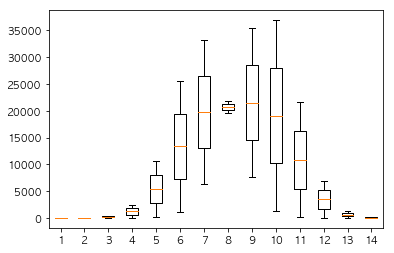

In [31]:
plt.boxplot(d_c)
plt.show()

### 박스그래프 내의 xtick 변경하기

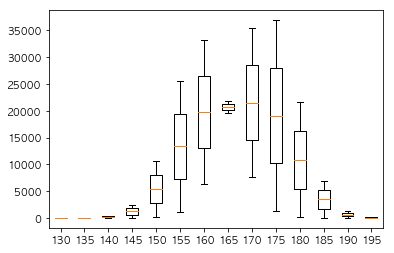

In [32]:
plt.boxplot(d_c)
plt.xticks([x+1 for x in range(0, d_c.index.shape[0] )], [x for x in d_c.index])
plt.show()

## 키별 분포 확인 

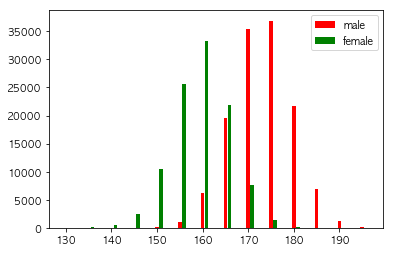

In [33]:
plt.bar(d_c.index, d_c[1], color='r',label='male')
plt.bar(d_c.index + 0.9, d_c[2],color='g',label='female')
plt.legend()


<BarContainer object of 14 artists>

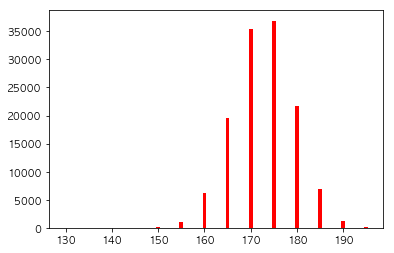

In [34]:
plt.bar(d_c.index, d_c[1], color='r',label='male')

<BarContainer object of 14 artists>

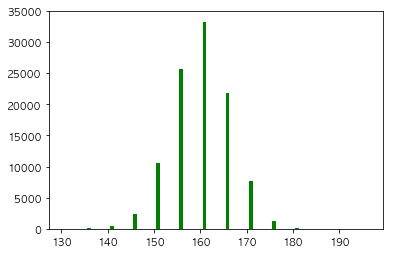

In [35]:
plt.bar(d_c.index + 0.9, d_c[2],color='g',label='female')